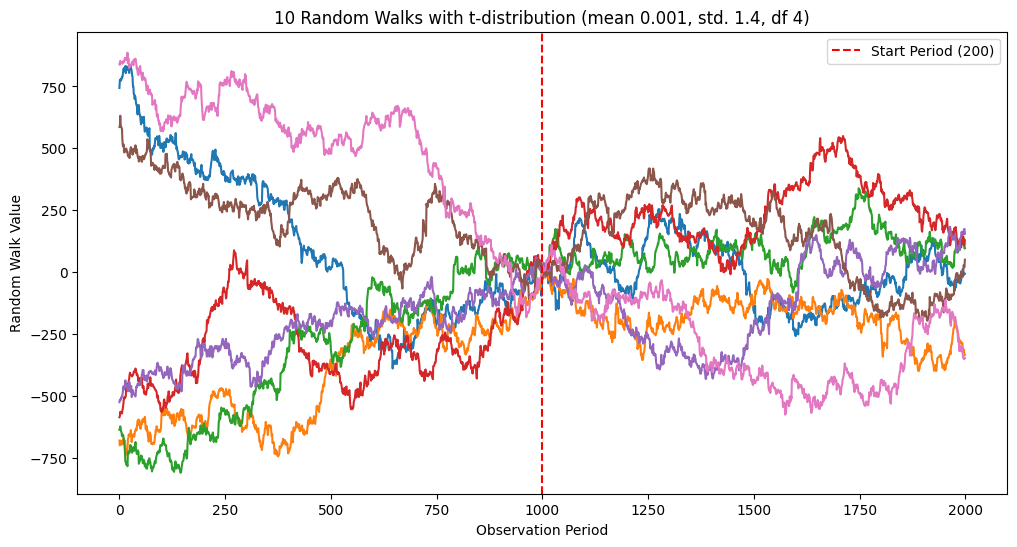

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters for the Monte Carlo simulation
num_simulations = 7
num_observations = 2000
start_period = 1000
mean = 0
std_dev = 10
df = 4 # Degrees of freedom for t-distribution

# Function to generate random walks using a t-distribution
def generate_t_dist_random_walks(n_simulations, n_observations, start_period, mean, std_dev, df):
    walks = []
    for _ in range(n_simulations):
        # Create random steps with t-distribution scaled to have the desired mean and standard deviation
        steps = t.rvs(df, loc=mean, scale=std_dev, size=n_observations)

        # Convert steps to a random walk
        random_walk = np.cumsum(steps)

        # Adjust so that all walks cross the same point at the start period
        adjustment = mean - random_walk[start_period]
        adjusted_walk = random_walk + adjustment

        walks.append(adjusted_walk)

    return walks

# Generating random walks with t-distribution
t_dist_random_walks = generate_t_dist_random_walks(num_simulations, num_observations, start_period, mean, std_dev, df)

# Plotting the t-distribution random walks
plt.figure(figsize=(12, 6))
for walk in t_dist_random_walks:
    plt.plot(walk)

plt.title("10 Random Walks with t-distribution (mean 0.001, std. 1.4, df 4)")
plt.xlabel("Observation Period")
plt.ylabel("Random Walk Value")
plt.axvline(x=start_period, color='r', linestyle='--', label="Start Period (200)")
plt.legend()
plt.show()


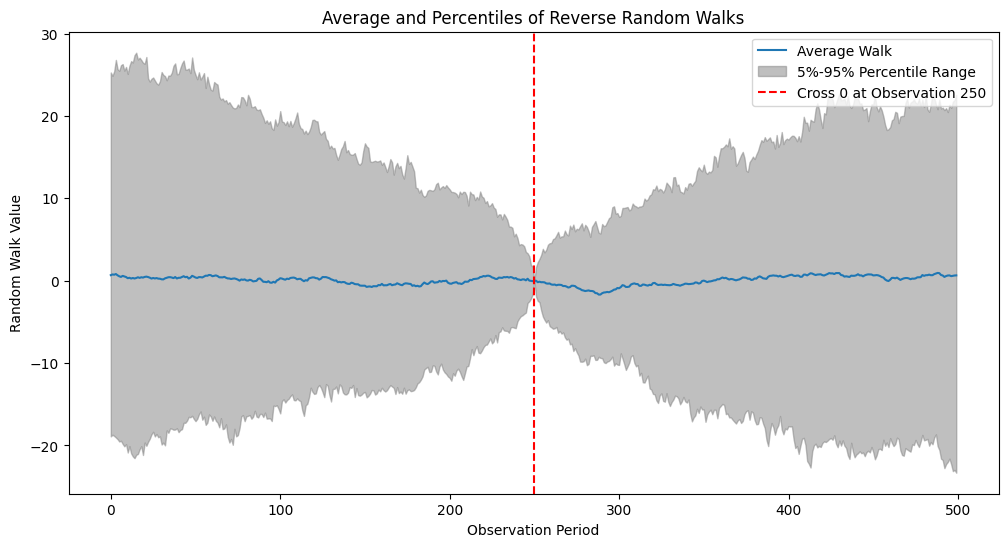

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Function to generate random walks using a t-distribution, starting at a random point and crossing 0 at observation n
def generate_reverse_random_walks(i_simulations, N_observations, n_start, mean, variance, df, v_percentiles):
    # Calculate the standard deviation from the variance
    std_dev = np.sqrt(variance)

    walks = np.zeros((i_simulations, N_observations))
    for i in range(i_simulations):
        # Generate the random steps
        steps = t.rvs(df, loc=mean, scale=std_dev, size=N_observations)

        # Create a random walk
        random_walk = np.cumsum(steps[::-1])[::-1]

        # Adjust so that all walks cross 0 at n
        adjustment = -random_walk[n_start]
        walks[i] = random_walk + adjustment

    return walks

# Parameters for the simulation
i_simulations = 100  # Number of simulations
N_observations = 500  # Total number of observations
n_start = 250         # The point where the walk should cross 0
mean = 0.00          # Mean of the t-distribution
variance = 1**2     # Variance of the t-distribution (std_dev^2)
df = 120                # Degrees of freedom for the t-distribution
v_percentiles = [5, 95] # Percentiles to plot

# Generating the random walks
walks = generate_reverse_random_walks(i_simulations, N_observations, n_start, mean, variance, df, v_percentiles)

# Calculating the average and percentiles
average_walk = np.mean(walks, axis=0)
lower_percentile = np.percentile(walks, v_percentiles[0], axis=0)
upper_percentile = np.percentile(walks, v_percentiles[1], axis=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_walk, label="Average Walk")
plt.fill_between(range(N_observations), lower_percentile, upper_percentile, color='gray', alpha=0.5, label=f"{v_percentiles[0]}%-{v_percentiles[1]}% Percentile Range")
plt.axvline(x=n_start, color='r', linestyle='--', label=f"Cross 0 at Observation {n_start}")
plt.title("Average and Percentiles of Reverse Random Walks")
plt.xlabel("Observation Period")
plt.ylabel("Random Walk Value")
plt.legend()
plt.show()


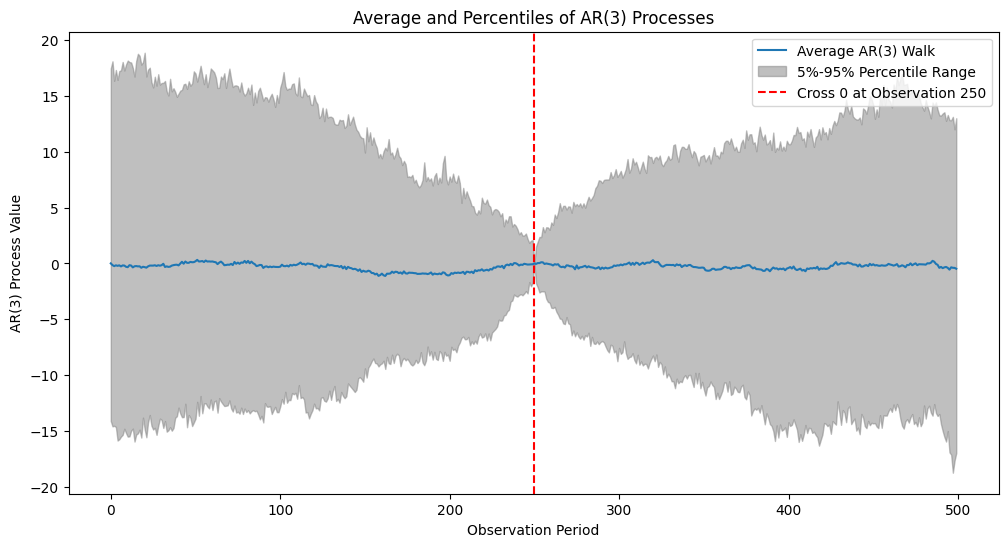

In [139]:
from statsmodels.tsa.arima_process import ArmaProcess

# Function to generate AR(3) processes based on a t-distributed random walk
def generate_ar3_processes(i_simulations, N_observations, n_start, mean, variance, df, v_percentiles, ar_params):
    # Calculate the standard deviation from the variance
    std_dev = np.sqrt(variance)

    walks = np.zeros((i_simulations, N_observations))
    for i in range(i_simulations):
        # Generate the random steps with a t-distribution
        steps = t.rvs(df, loc=mean, scale=std_dev, size=N_observations)

        # Convert steps to a random walk
        random_walk = np.cumsum(steps)

        # Create an AR(3) model from the random walk
        ar = np.array([1, -ar_params[0], -ar_params[1], -ar_params[2]]) # AR part
        ma = np.array([1]) # MA part is just [1] as it's an AR model
        arma_process = ArmaProcess(ar, ma)

        # Generate AR(3) process
        ar3_process = arma_process.generate_sample(nsample=N_observations, scale=std_dev, burnin=100)
        
        # Adjust so that all walks cross 0 at n
        adjustment = -ar3_process[n_start]
        walks[i] = ar3_process + adjustment

    return walks

# Parameters for the AR(3) process
ar_params = [0.5, 0.4, 0.1] # Coefficients for the AR(3) process

# Generating the AR(3) processes
ar3_walks = generate_ar3_processes(i_simulations, N_observations, n_start, mean, variance, df, v_percentiles, ar_params)

# Calculating the average and percentiles
average_ar3_walk = np.mean(ar3_walks, axis=0)
lower_percentile_ar3 = np.percentile(ar3_walks, v_percentiles[0], axis=0)
upper_percentile_ar3 = np.percentile(ar3_walks, v_percentiles[1], axis=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_ar3_walk, label="Average AR(3) Walk")
plt.fill_between(range(N_observations), lower_percentile_ar3, upper_percentile_ar3, color='gray', alpha=0.5, label=f"{v_percentiles[0]}%-{v_percentiles[1]}% Percentile Range")
plt.axvline(x=n_start, color='r', linestyle='--', label=f"Cross 0 at Observation {n_start}")
plt.title("Average and Percentiles of AR(3) Processes")
plt.xlabel("Observation Period")
plt.ylabel("AR(3) Process Value")
plt.legend()
plt.show()


In [ ]:
½